# Initial Preparation

## Import Packages

In [1]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from pandas_profiling import ProfileReport

## Import Data

In [2]:
url = "https://raw.githubusercontent.com/Cameron-Watts/PDS_Piece/main/data/raw/twitter_training.csv"

df = pd.read_csv(url, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

In [3]:
len(df)

74682

## Subset Data

In [4]:
#df = df.sample(frac=0.1)

## Visualise and Explore Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#profile

## Clean Data

<BarContainer object of 4 artists>

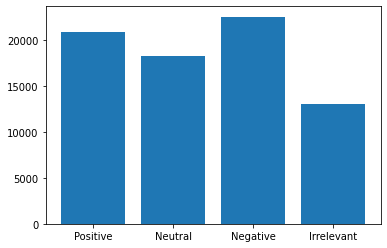

In [8]:
# To see what's going on before dropping datapoints
sentiments = list(df["Sentiment"].unique())

sentiment_nums = [len(df[df["Sentiment"] == sentiment]) for sentiment in sentiments]

labels = sentiments

plt.bar(sentiments, sentiment_nums)

In [9]:
df = df.dropna()

# Further Exploration

In [10]:
df["Sentiment"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [11]:
print(df["Entity"].unique())
print(len(df["Entity"].unique()))

onehot = pd.get_dummies(df["Entity"])

df = df.join(onehot)

df.head()

['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']
32


,Tweet_ID,Entity,Sentiment,Tweet_Content,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,Overwatch,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 4 artists>

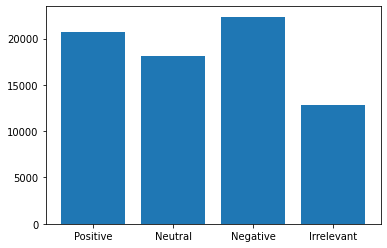

In [12]:
sentiments = list(df["Sentiment"].unique())

sentiment_nums = [len(df[df["Sentiment"] == sentiment]) for sentiment in sentiments]

labels = sentiments

plt.bar(sentiments, sentiment_nums)

## Stop Word Removal and Lemmatization With NLTK

In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


def remove_stopwords(ls):
    #Removes stop words and lemmatises
    ls = [lemmatiser.lemmatize(word) for word in ls if word not in (stopwords.words()) and (word.isalpha())]
    
    ls = " ".join(ls)
    return ls

df["Tweet_Content_Split"] = df["Tweet_Content"].apply(word_tokenize)

lemmatiser = WordNetLemmatizer()

df["Tweet_Content_Split"] = df["Tweet_Content_Split"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
list(df["Tweet_Content_Split"])[0]

'getting borderland murder'

## Tokenisation

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

2021-10-29 23:59:32.187830: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [16]:
tokeniser = Tokenizer(num_words=500, lower=True)

tokeniser.fit_on_texts(df["Tweet_Content_Split"])

In [17]:
tweet_tokens = tokeniser.texts_to_matrix(list(df["Tweet_Content_Split"]))

## Final Preparation of Data for Model

In [18]:
y = df["Sentiment"]

labels = set(df["Sentiment"])

class_to_index = {"Neutral":0, "Irrelevant":0, "Negative":1, "Positive": 2}

index_to_class = dict((v,k) for k, v in class_to_index.items())

names_to_ids = lambda y: np.array([class_to_index.get(x) for x in df["Sentiment"]])

ids_to_names = lambda y: np.array([index_to_class.get(x) for x in y])

train_labels = names_to_ids(y)

In [19]:
df["Labels"] = train_labels

In [20]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson,Tweet_Content_Split,Labels
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,getting borderland murder,2
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,I coming border I kill,2
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,getting borderland kill,2
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,coming borderland murder,2
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,getting borderland murder,2


## Subsetting Data

In [21]:
y = df["Labels"]

df2 = df.drop(["Sentiment", "Entity", "Tweet_ID", "Tweet_Content", "Tweet_Content_Split", "Labels"], axis=1)

In [22]:
array_3 = df2.to_numpy()

full_array = np.concatenate([array_3, tweet_tokens], axis=1)

In [23]:
full_df = pd.DataFrame(full_array)

full_df.shape

(73996, 532)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(full_df, y, test_size=0.2, random_state=1)

## Build Neural Network with Keras

In [25]:
#Test initial network
import tensorflow as tf

model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(1000,16,input_length=532),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

2021-10-29 23:59:40.172615: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-29 23:59:40.176012: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-29 23:59:40.217583: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-29 23:59:40.218212: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-29 23:59:40.218268: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-29 23:59:40.241763: I tensorflow/stream_executor/platform/def

## Testing Methods

### Neural Network with Keras

In [26]:
h = model.fit(
     X_train, y_train,
     validation_data=(X_test, y_test),
     epochs=20,
     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)]
)

2021-10-29 23:59:43.579273: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-29 23:59:43.589442: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000129999 Hz


Epoch 1/20


2021-10-29 23:59:47.905949: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-29 23:59:48.636059: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-10-29 23:59:48.686014: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


1850/1850 [==============================] - 159s 81ms/step - loss: 1.1004 - accuracy: 0.4183 - val_loss: 1.0649 - val_accuracy: 0.4300
Epoch 2/20
1850/1850 [==============================] - 146s 79ms/step - loss: 1.0626 - accuracy: 0.4416 - val_loss: 1.0602 - val_accuracy: 0.4383
Epoch 3/20
1850/1850 [==============================] - 148s 80ms/step - loss: 1.0524 - accuracy: 0.4547 - val_loss: 1.0474 - val_accuracy: 0.4599
Epoch 4/20
1850/1850 [==============================] - 148s 80ms/step - loss: 1.0441 - accuracy: 0.4613 - val_loss: 1.0431 - val_accuracy: 0.4688
Epoch 5/20
1850/1850 [==============================] - 150s 81ms/step - loss: 1.0401 - accuracy: 0.4660 - val_loss: 1.0390 - val_accuracy: 0.4659
Epoch 6/20
1850/1850 [==============================] - 149s 81ms/step - loss: 1.0345 - accuracy: 0.4744 - val_loss: 1.0338 - val_accuracy: 0.4612
Epoch 7/20
1850/1850 [==============================] - 150s 81ms/step - loss: 1.0261 - accuracy: 0.4794 - val_loss: 1.0284 - val

In [27]:
y_pred = model.predict(X_test)
preds = [round(sum(y_pred[i,:])) for i in range(len(y_pred))]

y_pred_labels = ids_to_names(preds)

In [28]:
print(y_pred_labels[0:5])

['Negative' 'Negative' 'Negative' 'Negative' 'Negative']


# Final

## Training With Full Dataset

In [29]:
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(1000,16,input_length=532),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

In [30]:
h = model.fit(
     full_df, y,
     epochs=20,
     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)]
)

Epoch 1/20
2313/2313 [==============================] - 170s 72ms/step - loss: 1.0979 - accuracy: 0.4154
Epoch 2/20
2313/2313 [==============================] - 165s 71ms/step - loss: 1.0639 - accuracy: 0.4406
Epoch 3/20
2313/2313 [==============================] - 166s 72ms/step - loss: 1.0468 - accuracy: 0.4598
Epoch 4/20
2313/2313 [==============================] - 166s 72ms/step - loss: 1.0377 - accuracy: 0.4703
Epoch 5/20
2313/2313 [==============================] - 168s 73ms/step - loss: 1.0300 - accuracy: 0.4778
Epoch 6/20
2313/2313 [==============================] - 168s 73ms/step - loss: 1.0231 - accuracy: 0.4845
Epoch 7/20
2313/2313 [==============================] - 168s 73ms/step - loss: 1.0208 - accuracy: 0.4843
Epoch 8/20
2313/2313 [==============================] - 167s 72ms/step - loss: 1.0215 - accuracy: 0.4820
Epoch 9/20
2313/2313 [==============================] - 168s 72ms/step - loss: 1.0155 - accuracy: 0.4910
Epoch 10/20
2313/2313 [==============================] 

## Generating Predictions

## Download and Transform Test Data

In [31]:
url = "https://raw.githubusercontent.com/Cameron-Watts/PDS_Piece/main/data/raw/twitter_validation.csv"

test_df = pd.read_csv(url, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

test_df = test_df.dropna()

In [32]:
onehot = pd.get_dummies(test_df["Entity"])

test_df = test_df.join(onehot)

test_df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,Overwatch,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4433,Google,Neutral,Now the President is slapping Americans in the...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
test_df["Tweet_Content_Split"] = test_df["Tweet_Content"].apply(word_tokenize)
test_df["Tweet_Content_Split"] = test_df["Tweet_Content_Split"].apply(remove_stopwords)

In [34]:
test_tweet_tokens = tokeniser.texts_to_matrix(list(test_df["Tweet_Content_Split"]))

In [35]:
y = test_df["Sentiment"]

names_to_ids = lambda y: np.array([class_to_index.get(x) for x in test_df["Sentiment"]])

test_labels = names_to_ids(y)

In [36]:
test_df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson,Tweet_Content_Split
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,I mentioned Facebook I struggling motivation g...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BBC News Amazon bos Jeff Bezos reject claim co...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Microsoft Why I pay WORD function poorly Samsu...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,CSGO matchmaking full closet hacking truly awf...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Now President slapping Americans really commit...


In [37]:
y = test_labels

test_df2 = test_df.drop(["Sentiment", "Entity", "Tweet_ID", "Tweet_Content", "Tweet_Content_Split"], axis=1)

In [38]:
model.evaluate(test_df2, y)

32/32 [==============================] - 1s 5ms/step - loss: 1.0690 - accuracy: 0.4850


[1.0690076351165771, 0.48500001430511475]

## Generate Predictions

In [39]:
y_pred = model.predict(X_test)
preds = [round(sum(y_pred[i,:])) for i in range(len(y_pred))]

y_pred_labels = ids_to_names(preds)